# Forest type
Input: 
- Forest4model_v1_Forest_type

Aim:
- TODO: Visualising each forest type in sample countries
- Calculating percentage share of each forest type over country's total forest cover

Output:
- A dataframe containing the percentage share of forest types in 32 EU countries

In [1]:
# Vector data
import geopandas as gpd

# Tabular data 
import pandas as pd
import numpy as np

# Raster array
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# System
from pathlib import Path

# Import functions from geo_tools module
from geo_tools import utils, forest_barplot, plot_iso_forest

# Reloads module
%load_ext autoreload
%autoreload 2

# Output directory

In [2]:
# Specify the desired output folder path for processed dataset
output_data_dir = Path.cwd() / ".." / "output_data"

# Check if the output folder exists, and create if not
Path.mkdir(output_data_dir, exist_ok=True, parents=True)

In [3]:
# Specify the desired output folder path for figures
output_figure_dir = Path.cwd() / ".." / "output_figures"

# Check if the output folder exists, and create if not
Path.mkdir(output_figure_dir, exist_ok=True, parents=True)

# A list of ISO3 codes of EU countries

In [4]:
eu_iso3 = pd.read_csv(output_data_dir/"Country_Codes_and_Names_ISO3.csv")

eu_iso = eu_iso3["ISO3"]

# Plotting data distribution

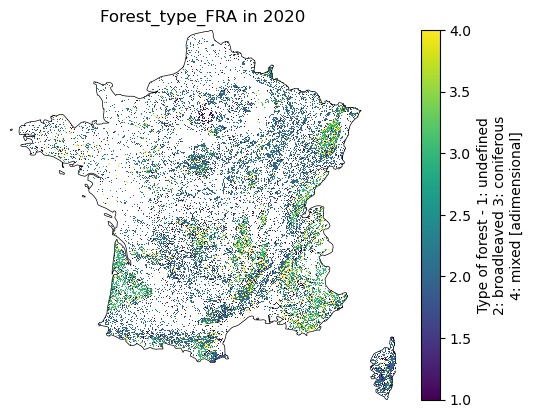

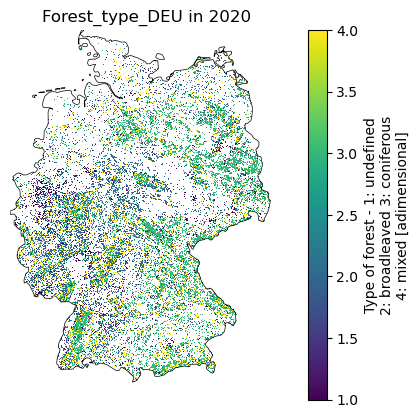

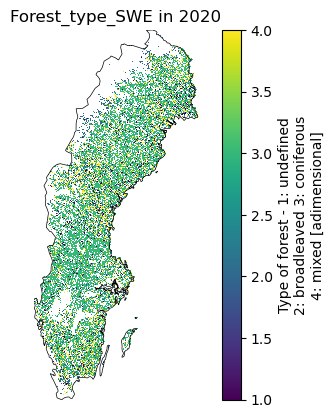

In [19]:
for iso_ex in ["FRA", "DEU", "SWE"]:
    plot_iso_forest.plot_forest(
        iso_code=iso_ex,
        xarray_id="Forest_type"
    )

### Undefined

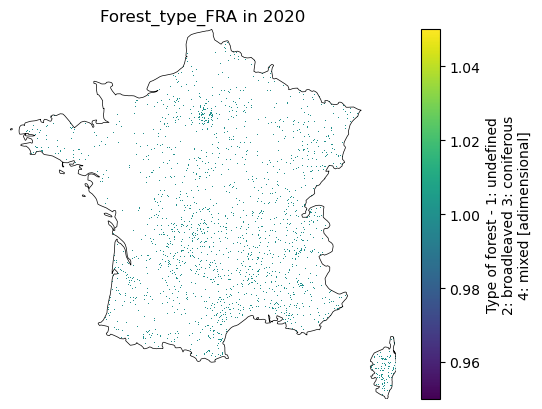

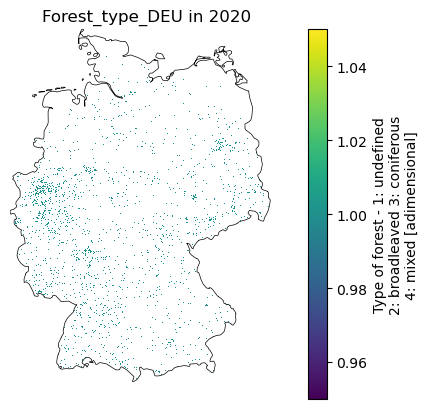

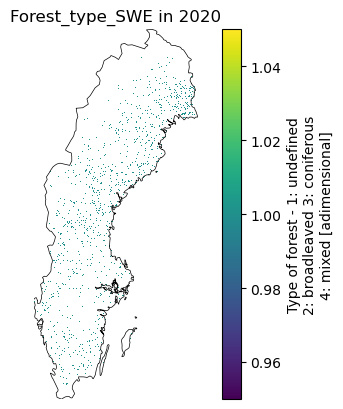

In [18]:
for iso_ex in ["FRA", "DEU", "SWE"]:
    plot_iso_forest.plot_forest_type(iso_code=iso_ex, xarray_id="Forest_type", forest_type_cat=1)

# Calculating area

In [46]:
%%time
# Template to store total area in Mha
type_cover_mha = []

# Template to store total area in percentage share
type_cover_perc = []

# Import forest cover data
forest_cover = pd.read_csv(output_data_dir/"iso_forest_cover_stats.csv")

for iso in eu_iso:

    # Calculate area of undefined forest
    iso_type_cover = plot_iso_forest.agg_area_forest_type(
        iso_code=iso, 
        xarray_id="Forest_type", 
        forest_type_cat=1, 
        forest_layer_year=2020
    )
    type_cover_mha.append(iso_type_cover)

    # Get forest cover area within the country
    iso_forest_cover = forest_cover.loc[forest_cover.Region == iso]
    value_to_copy = iso_forest_cover.iloc[0, 5]

    # Copy forest cover to iso_fraction_class
    iso_type_cover[f"{iso}_forest_cover_Mha"] = value_to_copy

    # Calculate percentage share of fraction classes over total forest cover
    iso_type_cover["Percentage share"] = iso_type_cover["Value"] / iso_type_cover[f"{iso}_forest_cover_Mha"]

    # Creating final dataset
    iso_type_perc = iso_type_cover.drop(["Unit", "Value", f"{iso}_forest_cover_Mha"], axis=1)

    iso_type_perc.insert(
        loc=3,
        column="Unit",
        value="Percentage share"
    )

    iso_type_perc.rename(
        columns={"Percentage share" : "Value"},
        inplace=True
    )
    type_cover_perc.append(iso_type_perc)

type_cover_perc_df = pd.concat(type_cover_perc)

CPU times: user 45.6 s, sys: 1min 14s, total: 2min
Wall time: 7min 55s


In [48]:
type_cover_perc_df

,Region,Variable,Year,Unit,Value
0,BGR,Forest type: Undefined,2020,Percentage share,0.018402
0,CYP,Forest type: Undefined,2020,Percentage share,0.035627
0,DNK,Forest type: Undefined,2020,Percentage share,0.044005
0,IRL,Forest type: Undefined,2020,Percentage share,0.119398
0,EST,Forest type: Undefined,2020,Percentage share,0.078648
0,AUT,Forest type: Undefined,2020,Percentage share,0.069222
0,CZE,Forest type: Undefined,2020,Percentage share,0.066761
0,FIN,Forest type: Undefined,2020,Percentage share,0.071666
0,FRA,Forest type: Undefined,2020,Percentage share,0.098923
0,DEU,Forest type: Undefined,2020,Percentage share,0.084526


In [ ]:
# Append the result from other forest types into type_cover_perc_df then export as a CSV